   SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa


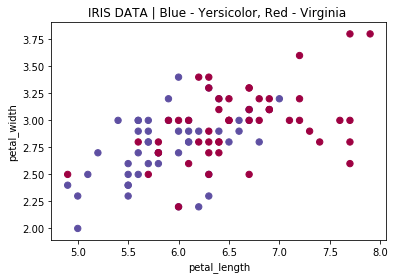

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
iris = pd.read_csv('iris.csv')
print(iris.head())
iris.loc[iris['Name']=='Iris-virginica','Name']=0
iris.loc[iris['Name']=='Iris-versicolor','Name']=1
iris.loc[iris['Name']=='Iris-setosa','Name']=2
iris=iris[iris['Name']!=2]
X=iris[['SepalLength','SepalWidth']].values.T
Y=iris[['Name']].values.T
Y=Y.astype('uint8')
plt.scatter(X[0,:],X[1,:],c=Y[0,:],s=40,cmap=plt.cm.Spectral)
plt.title("IRIS DATA | Blue - Yersicolor, Red - Virginia ")
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()

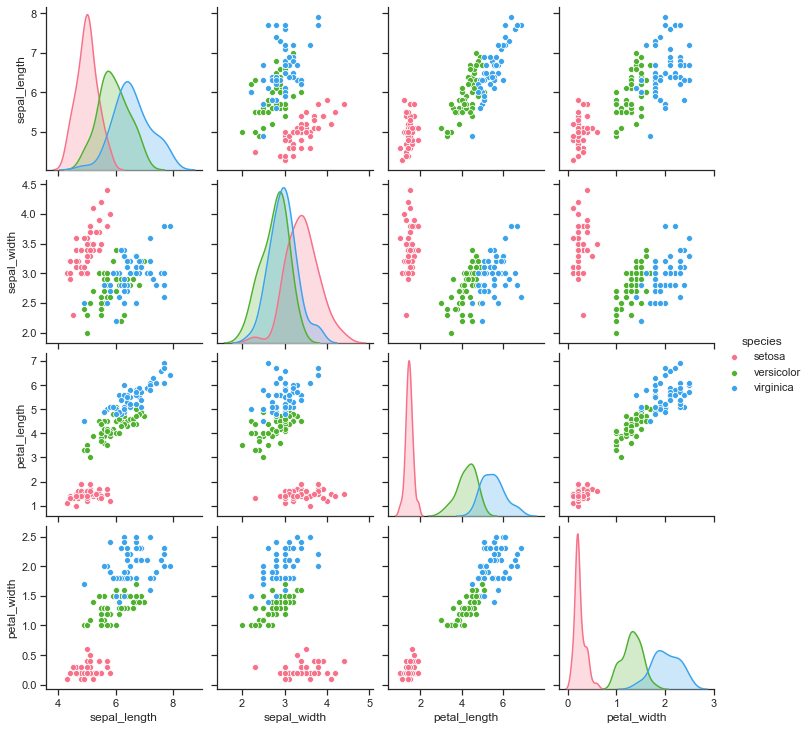

In [6]:
import seaborn as sns
import numpy as np
sns.set(style="ticks",color_codes=True)
Iris=sns.load_dataset("iris")
g=sns.pairplot(Iris,hue="species",palette="husl")

In [9]:
Iris.info()
Iris['species'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [11]:
from sklearn.preprocessing import LabelEncoder

X=Iris.iloc[:,0:4].values
y=Iris.iloc[:,4].values
encoder=LabelEncoder()
y1 = encoder.fit_transform(y)
Y=pd.get_dummies(y1).values
print(Y)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(64,input_shape=(4,),activation="relu"))
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________


In [15]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=100)

Train on 120 samples, validate on 30 samples
Epoch 1/100
120/120 [==============================] - 0s 2ms/step - loss: 1.4157 - accuracy: 0.3250 - val_loss: 1.1065 - val_accuracy: 0.3667
Epoch 2/100
120/120 [==============================] - 0s 58us/step - loss: 1.0999 - accuracy: 0.3250 - val_loss: 0.9515 - val_accuracy: 0.4000
Epoch 3/100
120/120 [==============================] - 0s 83us/step - loss: 0.9383 - accuracy: 0.7000 - val_loss: 0.9007 - val_accuracy: 0.6000
Epoch 4/100
120/120 [==============================] - 0s 81us/step - loss: 0.8587 - accuracy: 0.7083 - val_loss: 0.8960 - val_accuracy: 0.5667
Epoch 5/100
120/120 [==============================] - 0s 75us/step - loss: 0.8185 - accuracy: 0.6917 - val_loss: 0.8746 - val_accuracy: 0.5667
Epoch 6/100
120/120 [==============================] - 0s 75us/step - loss: 0.7750 - accuracy: 0.6917 - val_loss: 0.8128 - val_accuracy: 0.5667
Epoch 7/100
120/120 [==============================] - 0s 75us/step - loss: 0.7252 - accurac

Epoch 57/100
120/120 [==============================] - 0s 83us/step - loss: 0.1149 - accuracy: 0.9667 - val_loss: 0.1446 - val_accuracy: 1.0000
Epoch 58/100
120/120 [==============================] - 0s 58us/step - loss: 0.1158 - accuracy: 0.9667 - val_loss: 0.1394 - val_accuracy: 1.0000
Epoch 59/100
120/120 [==============================] - 0s 58us/step - loss: 0.1177 - accuracy: 0.9667 - val_loss: 0.1260 - val_accuracy: 1.0000
Epoch 60/100
120/120 [==============================] - 0s 83us/step - loss: 0.1097 - accuracy: 0.9750 - val_loss: 0.1282 - val_accuracy: 1.0000
Epoch 61/100
120/120 [==============================] - 0s 50us/step - loss: 0.1092 - accuracy: 0.9667 - val_loss: 0.1353 - val_accuracy: 1.0000
Epoch 62/100
120/120 [==============================] - 0s 75us/step - loss: 0.1104 - accuracy: 0.9667 - val_loss: 0.1274 - val_accuracy: 1.0000
Epoch 63/100
120/120 [==============================] - 0s 67us/step - loss: 0.1079 - accuracy: 0.9750 - val_loss: 0.1166 - val_ac

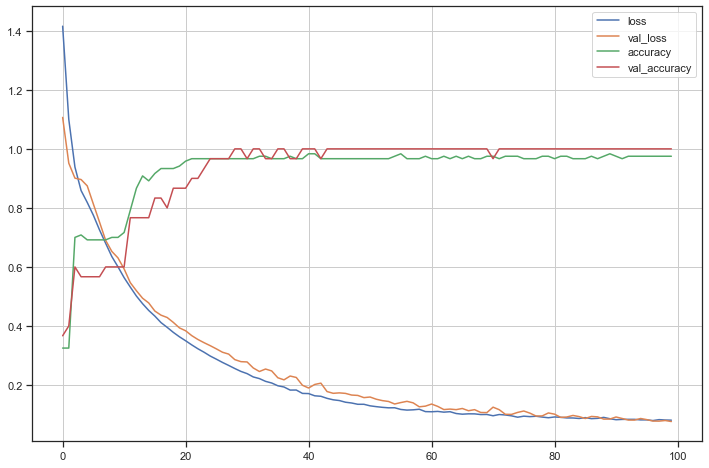

In [16]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss','accuracy','val_accuracy'])
plt.grid()
plt.show()